In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
cate_cols=[]
for col in df.columns:
    if df.columns.dtype=='object':
        cate_cols.append(col)
cate_cols

['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']

In [11]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
for col in cate_cols:
    df[col]=LE.fit_transform(df[col])
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [12]:
y=df['unacc']
x=df.drop('unacc',axis=1)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
scaler = StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.fit_transform(test_x)

In [14]:
model=DecisionTreeClassifier()

In [15]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [17]:
y_hat=model.predict(test_x)
y_hat

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 3, 0, 1, 2, 2,
       1, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 3, 0, 0, 2, 3, 0, 2, 1, 2, 0, 0,
       3, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 1, 3, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0,

In [22]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report
print('accuracy',accuracy_score(test_y,y_hat))
print('\nconfusion \n\n',confusion_matrix(test_y,y_hat))
print('\nClassification Report \n\n',classification_report(test_y,y_hat))

accuracy 0.9710982658959537

confusion 

 [[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]

Classification Report 

               precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



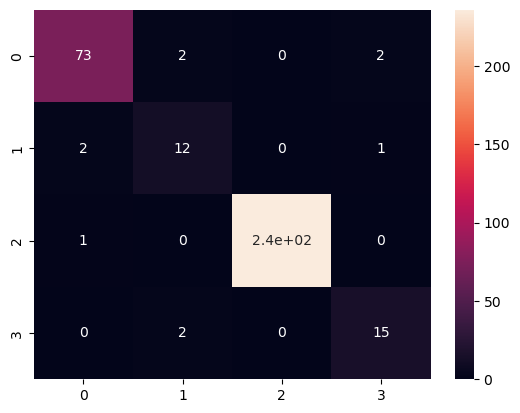

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_y,y_hat),annot=True)
plt.show()

In [25]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=test_x,
                class_names=list(test_x.values))

viz

ModuleNotFoundError: No module named 'dtreeviz'